<h2>Autonomous Taxi Agent</h2>
<h4>From scratch implementation of the Q-learning algorithm.</h4>

Q-learning is a type of machine learning algorithm where an agent learns how to make decisions by interacting with an environment. The goal of the agent is to **figure out the best actions** to take in different situations to maximize the rewards it gets over time.

Think of it like teaching a robot to navigate a maze. The robot doesn't know the way out at first, but as it moves through the maze, it gets rewards or penalties based on how well it performs (like getting closer to the exit or hitting a wall). The robot uses these rewards to learn which actions lead to the best outcomes.

In Q-learning, the agent keeps track of the **"Q-values"** for each possible action it can take in a given state. A Q-value is simply **a score that tells the agent how good it is to take a particular action in a particular situation**. The agent updates these scores after each action, gradually learning which actions lead to the highest rewards.

The learning process happens over time as the agent explores the environment and tries different actions. Initially, the agent may take random actions, but as it gathers more experience, it starts choosing the actions that lead to higher rewards, learning from past mistakes.











In [4]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [5]:
env = gym.make('Taxi-v3')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


1. **gym**: This is a library that provides various environments for reinforcement learning.
2. **gym.make('Taxi-v3')**: The make function in Gym is used to create a specific environment. In this case, 'Taxi-v3' refers to a particular environment in Gym called Taxi-v3. It's a simple environment where an agent has to pick up and drop off passengers in a taxi, navigating a grid-like world.

In [6]:
! pip install pygame

In [7]:
!apt-get install -y xvfb


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.12).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [8]:
!pip install gym pyvirtualdisplay

In [9]:
from IPython import display
from pyvirtualdisplay import Display
from matplotlib import animation

d = Display()
d.start()

An **episode** is one full interaction with the environment, where the agent starts in an initial state, takes actions, and ends in a terminal state.

[{'episode': 1, 'score': -677}, {'episode': 2, 'score': -776}, {'episode': 3, 'score': -785}, {'episode': 4, 'score': -767}, {'episode': 5, 'score': -713}, {'episode': 6, 'score': -830}, {'episode': 7, 'score': -614}, {'episode': 8, 'score': -857}, {'episode': 9, 'score': -641}, {'episode': 10, 'score': -857}, {'episode': 11, 'score': -767}, {'episode': 12, 'score': -857}, {'episode': 13, 'score': -812}, {'episode': 14, 'score': -821}, {'episode': 15, 'score': -722}, {'episode': 16, 'score': -758}, {'episode': 17, 'score': -749}, {'episode': 18, 'score': -812}, {'episode': 19, 'score': -713}, {'episode': 20, 'score': -648}]


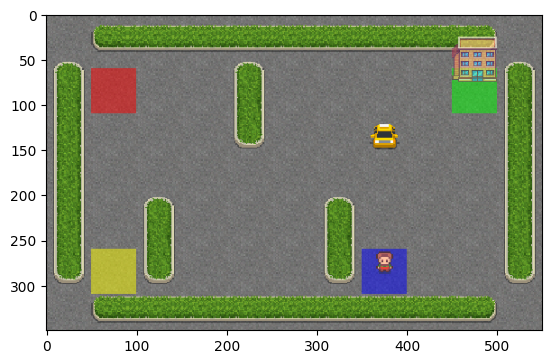

In [10]:
episodes = 20
results = []

for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    prev_screen = env.render(mode='rgb_array')
    plt.imshow(prev_screen)
    img = []

    while not done:
        next_state, reward, done, info = env.step(env.action_space.sample())
        score += reward
        display.clear_output(wait=True)
        img.append(env.render('rgb_array'))


    results.append({'episode': episode, 'score': score})


print(results)



**next_state, reward, done, info = env.step(env.action_space.sample()):**
1. env.action_space.sample() selects a random action for the agent to perform.
2. env.step() takes that action and returns:
- next_state: The next state after taking the action.
- reward: The reward the agent receives for taking that action.
- done: A boolean indicating whether the episode is over (i.e., whether the agent has reached a terminal state).
- info: Additional info provided by the environment, often used for debugging.

**No Learning Algorithm:** Without a learning algorithm like Q-learning or Deep Q Networks (DQN), the agent doesn't have a method to improve its decisions over time. Each episode starts fresh without any memory of what was learned in previous episodes, leading to consistently poor performance

<h2>Implement the Q-Learning Algorithm from scratch:</h2>

In [11]:
actions = env.action_space.n
state = env.observation_space.n

q_table = np.zeros((state, actions))

In [13]:
actions

6

In [14]:
state

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500

1. **actions = env.action_space.n**: This retrieves the number of possible actions the agent can take in the environment. (in the 'Taxi-v3' environment, there are 6 possible actions).

2. **state = env.observation_space.n**: This retrieves the number of possible states the environment can be in. env.observation_space.n returns the total number of discrete states in the environment (for example, in 'Taxi-v3', there are 500 possible states).

3. **q_table = np.zeros((state, actions))**: where each row corresponds to a state, and each column corresponds to an action. The values in the Q-table represent the expected reward of taking a particular action in a particular state. Initially, these values are set to zero, and over time, the Q-learning algorithm will update them to reflect the agent's learning about the best actions to take in each state.

In [12]:
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 0.8
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

If the randomly generated threshold is greater than exploration_rate, the agent will **exploit its knowledge by selecting the action with the highest Q-value** (np.argmax(q_table[state,:])). Otherwise, **it will explore and take a random action** (env.action_space.sample()).

In [13]:
for episode in range(num_episodes):
  state = env.reset()
  done = False
  rewards_cur_episode = 0

  for step in range(max_steps_per_episode):


    exploration_threshold = np.random.uniform(0, 1)
    # if greater than then we will take an action based on the q_table
    if exploration_threshold > exploration_rate:
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    next_state, reward, done, info = env.step(action)

    #Update Q-Table
    q_table[state, action] = q_table[state, action]*(1-learning_rate) + learning_rate*(reward + discount_rate*np.max(q_table[next_state, :]))

    state = next_state
    rewards_cur_episode += reward

    if done == True:
      break

  #A mathemalical equation to decay the exploration rate over time so we start take action from our Q-Table instead of taking random action
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

  rewards_all_episodes.append(rewards_cur_episode)

print("*******Training Finished*******")

*******Training Finished*******


In [20]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 7.06369464,  8.19213713,  7.11174985,  7.76969208,  9.6220697 ,
        -0.8676841 ],
       [11.50616651, 12.58369796, 11.59724042, 12.90720413, 14.11880599,
         3.8342554 ],
       ...,
       [ 4.30150552,  5.15767149,  4.39626777, 12.64961246, -2.89319007,
        -3.5989719 ],
       [ 2.46603246,  3.07076008,  2.69134543, 10.57605907, -5.16622563,
        -6.41527319],
       [13.25553238, 13.83833362, 15.89309891, 18.79978786,  7.43549861,
         5.95594431]])

<h3>Evaluating the Model:</h3>

In [21]:
rewards_per_1000_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
cnt = 1000

print("Average per thousand episodes")
for r in rewards_per_1000_episodes:
  print(cnt, ": ", str(sum(r/1000)))
  cnt += 1000

Average per thousand episodes
1000 :  -290.0060000000002
2000 :  7.98499999999997
3000 :  13.932999999999863
4000 :  14.931999999999839
5000 :  14.52799999999985
6000 :  -147.01499999999987
7000 :  8.338999999999956
8000 :  14.09999999999987
9000 :  14.46999999999985
10000 :  14.73999999999984


The results show the average reward per 1000 episodes of training the agent. In the first 1000 episodes, the agent performs poorly with an average reward of approximately -290, but as training progresses, the performance improves, reaching positive rewards (around 7 to 14) in later batches. There is a noticeable dip at episode 6000 with a negative average reward of about -147, but overall, the agent appears to stabilize and perform better over time, suggesting it is learning to make better decisions.

step:  10  reward:  20
******Reached Goal******


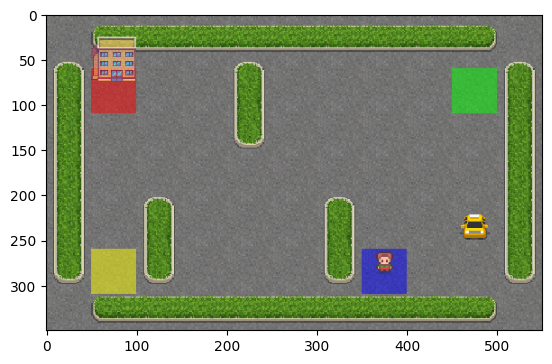

In [14]:
for episode in range(30):
  state = env.reset()
  done = False
  print("Episode: ", episode)

  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  for step in range(max_steps_per_episode):
    action = np.argmax(q_table[state, :])

    next_state, reward, done, info = env.step(action)

    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))

    print("step: ", step, " reward: ", reward)


    if done:
      #display.clear_output(wait=True)
      if reward == 20:
        print("******Reached Goal******")
      else:
        print("******Failed******")
      img.append(env.render('rgb_array'))

      break
    state = next_state

env.close()

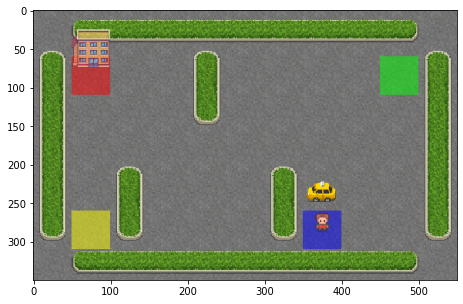

In [15]:
dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))